# Getting Started with the DALLE-2 API
Copyright 2023 Denis Rothman, MIT License

"The software's name is a portmanteau of the names of animated robot Pixar character WALL-E and the Spanish surrealist artist Salvador Dalí."

[Read the documentation and Terms of Use BEFORE running the notebook](https://beta.openai.com/docs/guides/images/introduction)


**Generations from OpenAI documentation**<br>
"The image generations endpoint allows you to create an original image given a text prompt. Generated images can have a size of 256x256, 512x512, or 1024x1024 pixels. Smaller sizes are faster to generate. You can request 1-10 images at a time using the n parameter."

**Recommended Technical Requirements** <br>
1.This notebook was designed for Google Colaboratory<br>
2.This notebook runs with Google Drive

Note: you can modify the code for another environment.


#Defining the Goal

In [1]:
#creation prompt
sequence="Creating an image of a person using a chatbot in a restaurant on a spaceship near the moon."

In [2]:
try:
 from PIL import Image
except:
  !pip install pillow

In [3]:
import PIL
from PIL import Image, ImageDraw
import requests

# Installing OpenAI

In [4]:
try:
  import openai
except:
  !pip install openai
  import openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 1.4 MB/s eta 0:00:00


#API KEY

[Drive documentation](https://colab.research.google.com/notebooks/io.ipynb#scrollTo=7taylj9wpsA2)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#API Key
#Store you key in a file and read it(you can type it directly in the notebook but it will be visible for somebody next to you)
from google.colab import drive
drive.mount('/content/drive')
f = open("drive/MyDrive/files/api_key.txt", "r")
API_KEY=f.readline()
f.close()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
#OpenAI Key in environnement
import os
os.environ['OPENAI_API_KEY'] =API_KEY
openai.api_key = os.getenv("OPENAI_API_KEY")

# 1.Creating and displaying an Image

In [8]:
#creating an image or images
response = openai.Image.create(
prompt=sequence,
n=1, #number of images to produce
size="1024x1024")
image_url = response['data'][0]['url']

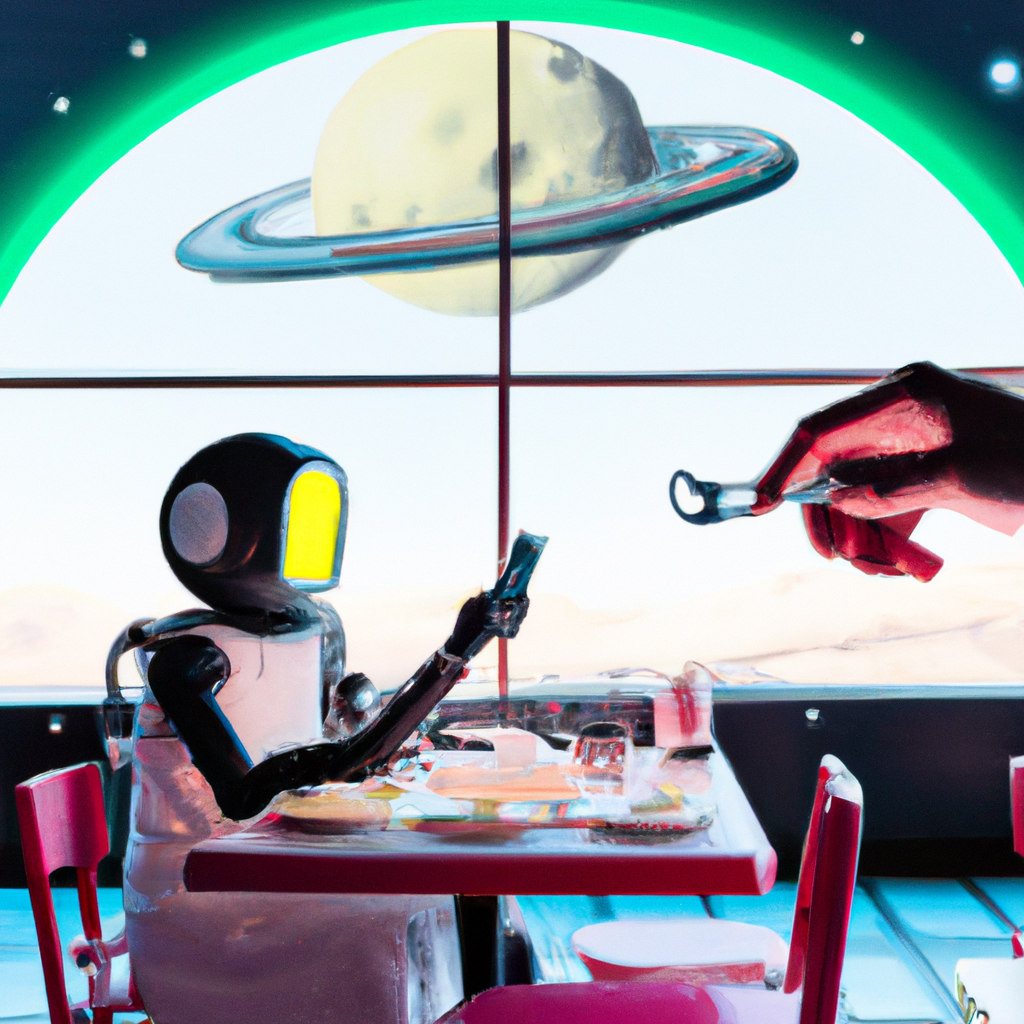

In [9]:
# displaying the image
url = image_url
image = Image.open(requests.get(url, stream=True).raw)
image.save("c_image.png", "PNG")
c_image = Image.open(requests.get(url, stream=True).raw)
c_image

# 2.Creating a Variation

Try uploading other images to see the capabilities of this feature and obtain better variations. The variation code below shows how to run the variations. It may create significant variations, slight variations, or no variations:<br>

-The DALL-E 2 API is constantly evolving and has its limits <br>
-Our imagination is factor as well for the prompts and choice of images<br>


In [11]:
#creating a variation of an image
response = openai.Image.create_variation(
image=open("c_image.png", "rb"),
n=1,
size="1024x1024")
image_url = response['data'][0]['url']

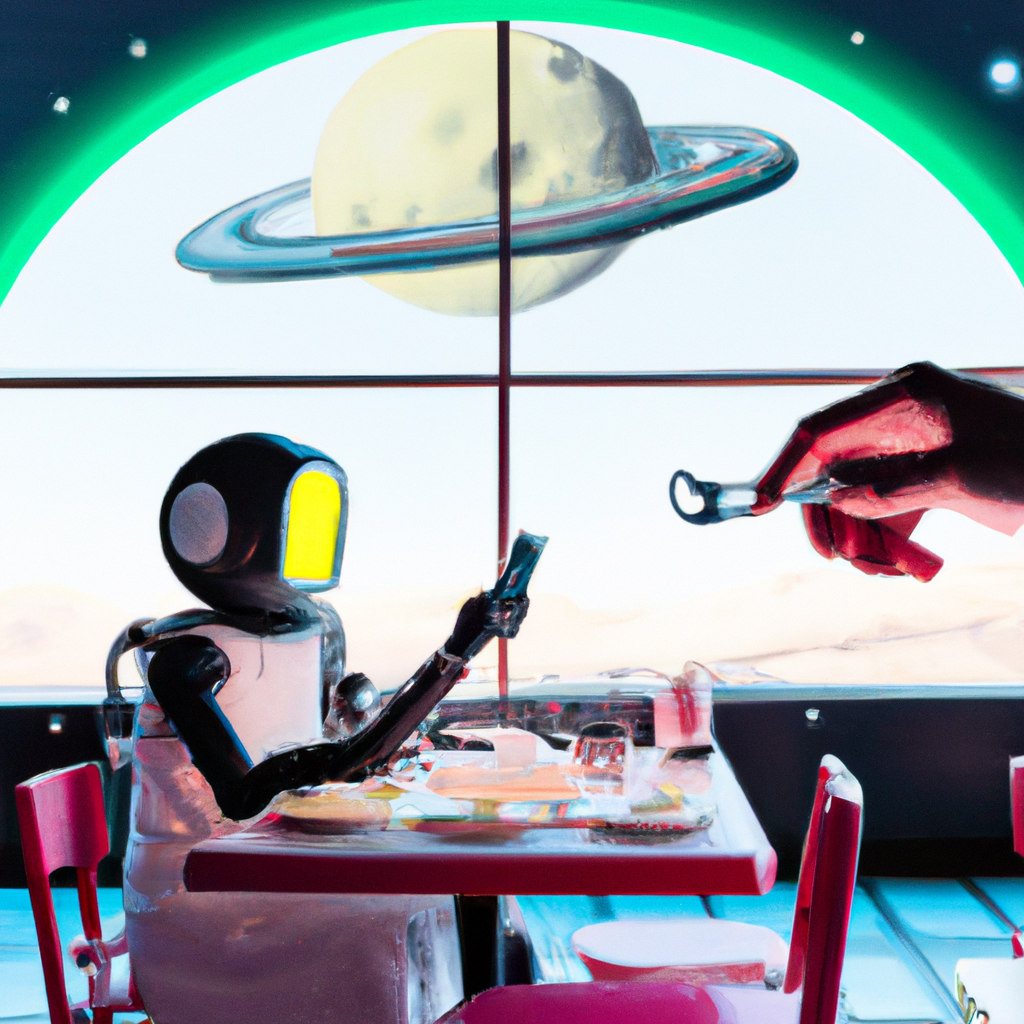

In [12]:
image_url = response['data'][0]['url']
image = Image.open(requests.get(url, stream=True).raw)
v_image = Image.open(requests.get(url, stream=True).raw)
v_image